In [42]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import gif
from scipy.stats import norm
from scipy.stats import poisson


Implement the Gibbs sampler for normal distibution in the following cell.

In [43]:
def gibbs_sampler(initial_values, y, w, alfa, beta, num_posterior_samples=50):
    n = len(y)

    mu_samples = np.zeros((num_posterior_samples, 1))
    tau_samples = np.zeros((num_posterior_samples, 1))
    mu_samples[0] = initial_values[0]
    tau_samples[0] = initial_values[1]

    # TODO: Implement the Gibbs sampler for Normal distribution

    return mu_samples, tau_samples


In [44]:
# To create a gif image
@gif.frame
def plot_samples_normal(x, true_pdf, estimated_pdf, num_samples, title="Gibbs Sampling Normal dist",):
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca()
    
    # Plot the true distribution
    ax.plot(x, true_pdf, label = "True distribution")
    
    # Plot the estimated distribution after each iteration
    ax.plot(x, estimated_pdf, label = "Estimated distribution after "+str(num_samples)+" iterations")
    
    # Keeping the axes scales same for good gifs
    # ax.set_xlim(xlims)
    ax.set_ylim((0, 0.3))
    
    
    ax.legend(loc='upper left')
    ax.set_title(title)

In [45]:
#Simulate data to check the Gibbs sampler
n = 100 #sample size
sigma_true = 2
sigma2_true = sigma_true**2
mu_true = 5
np.random.seed(4)
y = mu_true + np.random.randn(n)*sigma_true

In [46]:
initial_values = [1,5]
alpha = 1
beta = 1
w = 1
num_posterior_samples = 50

mu_samples,tau_samples = gibbs_sampler(initial_values, y, w, alpha, beta, num_posterior_samples)

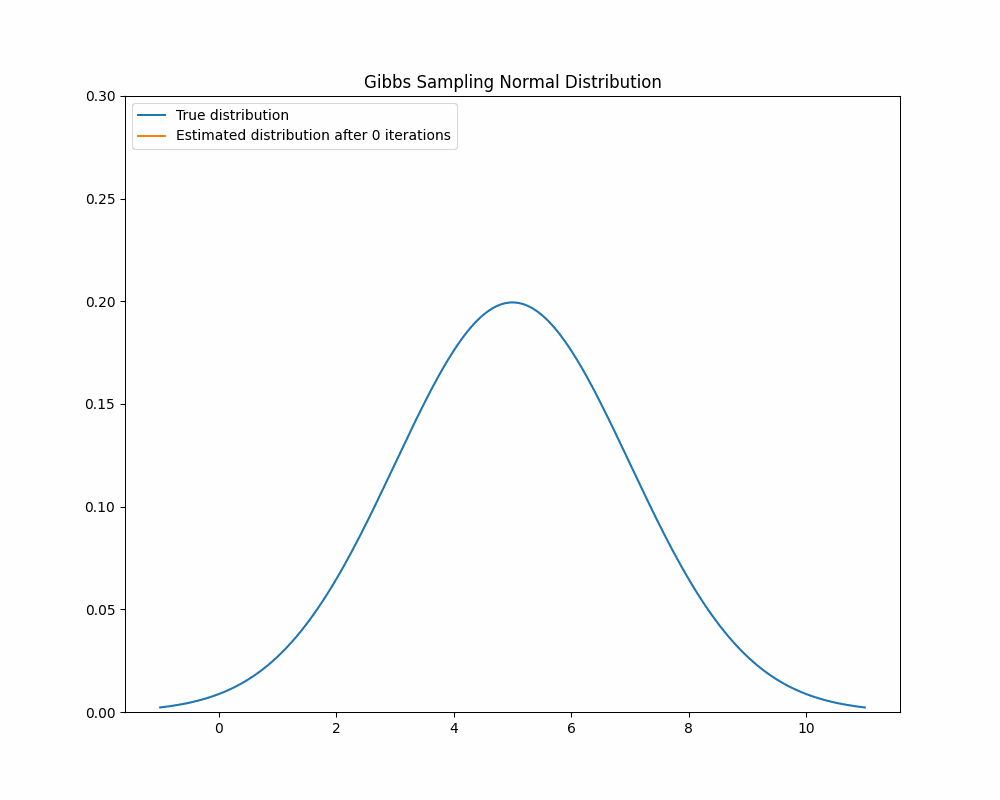

In [47]:
# Creating the gif
x = np.linspace(mu_true-3*sigma_true, mu_true + 3*sigma_true, 1000 )
true_pdf = norm.pdf(x, mu_true, sigma_true)

frames = []
for num_samples in range(len(mu_samples)):
    mu = np.mean(mu_samples[:num_samples])
    sigma = np.sqrt(np.mean(tau_samples[:num_samples]))
    estimated_pdf = norm.pdf(x, mu, sigma)
    

    frame = plot_samples_normal(x, true_pdf, estimated_pdf, num_samples,title="Gibbs Sampling Normal Distribution")
    frames.append(frame)

gif.save(frames, "gibbs_normal.gif", duration=150)
Image(filename="gibbs_normal.gif")

Implement the Gibbs sampler for poisson distibution in the following cell.

In [48]:
# Gibbs sampler
def gibbs_sampler_pois(initial_values, y, num_posterior_samples):
    n = len(y)
    mu_samples = np.zeros((num_posterior_samples, 1))
    beta_samples = np.zeros((num_posterior_samples, 1))
    mu_samples[0] = initial_values[0]
    beta_samples[0] = initial_values[1]

    # TODO: Implement the Gibbs sampler for Poisson distribution

    return mu_samples, beta_samples

In [49]:
# Generate y values
n = 100 #sample size
true_param = 4
np.random.seed(4)
y_pois = np.random.poisson(true_param, n)

In [50]:
initial_values = [1,2]
num_posterior_samples = 50

mu_samples, beta_samples = gibbs_sampler_pois(initial_values, y_pois, num_posterior_samples)

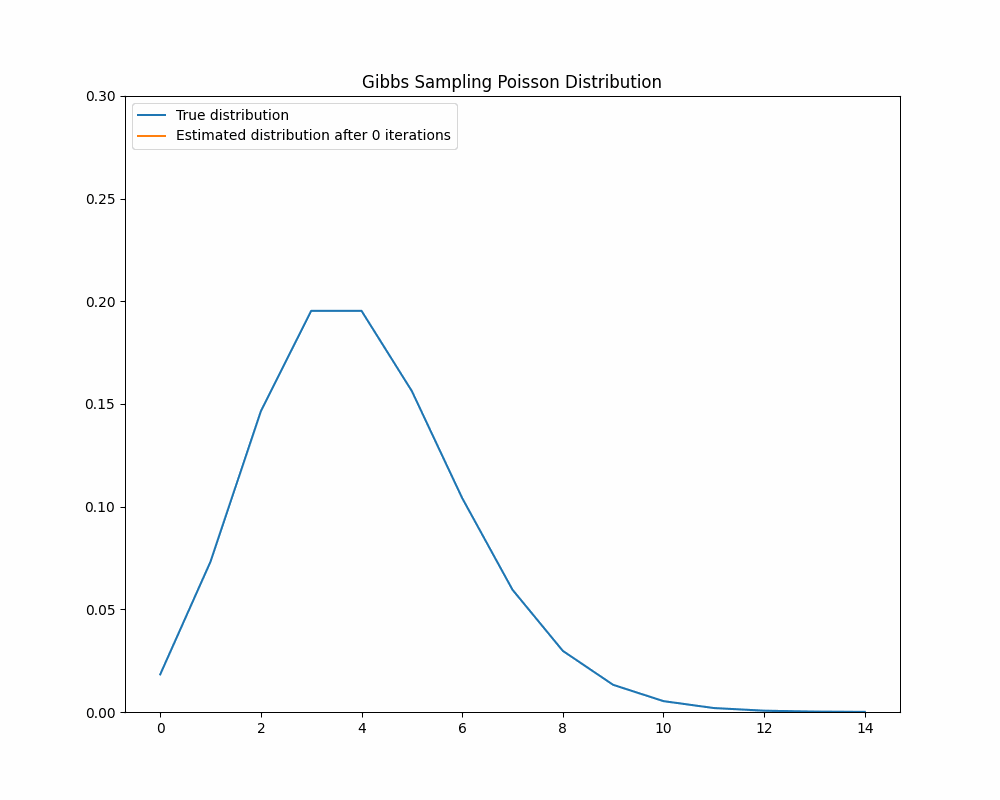

In [51]:
# Creating the gif
x = np.arange(0,15)
true_pdf = poisson.pmf(x, true_param)

frames = []
for num_samples in range(len(mu_samples)):
    mu = np.mean(mu_samples[:num_samples])
    estimated_pdf = poisson.pmf(x, mu)
    
    frame = plot_samples_normal(x, true_pdf, estimated_pdf, num_samples, title="Gibbs Sampling Poisson Distribution")
    frames.append(frame)

gif.save(frames, "gibbs_poisson.gif", duration=150)
Image(filename="gibbs_poisson.gif")